### Ex 1 Classes


1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create init() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()
7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
    
    A. Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url
    
8. Read student data into a list from a csv file:
        
    A. loop through the list and print each student with name, img_url and avg_grade.
    
    B. sort the list by avg_grade.
    
    C. create a bar chart with student_name on x and avg_grade on y-axis.
9. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
10. Show a line graph of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

Extra: Make the Datasheet class iterable so that next(data_sheet) will return the next course in the list

Walter, https://i.imgur.com/7ddcwox.png, 10.0
Vikke, https://i.imgur.com/7ddcwox.png, 2.0
William, https://i.imgur.com/jUYx9l5.jpg, 10.0


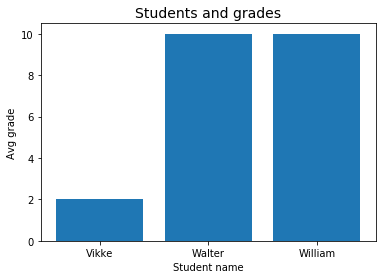

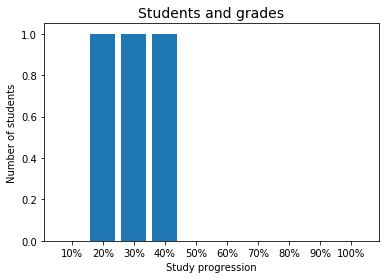

In [85]:
from Course import Course
from DataSheet import DataSheet
from Student import Student
import RandomFunc as randomFunc
import matplotlib.pyplot as plt
import math

randomFunc.writeToCsv(4)
students = randomFunc.readFromCsv()

simpleDict = {}
procentProgress = []
for studentName in students:
    student = students[studentName]
    simpleDict[studentName] = student.getAvgGrade()
    procentProgress.append(int(math.ceil(student.showProgress() / 10.0)) * 10)
    print('{}, {}, {}'.format(student.name, student.imgUrl, student.getAvgGrade()))

simpleSorted = {k: v for k, v in sorted(simpleDict.items(), key=lambda item: item[1])}
plt.bar(simpleSorted.keys(), simpleSorted.values())
plt.title("Students and grades", fontsize=14)
plt.xlabel("Student name", fontsize=10)
plt.ylabel("Avg grade", fontsize=10)
plt.show()


Labels = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
sizes = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in procentProgress:
    sizes[int(i/10)] += 1
plt.bar(Labels, sizes)
plt.title("Students and grades", fontsize=14)
plt.xlabel("Study progression", fontsize=10)
plt.ylabel("Number of students", fontsize=10)
plt.show()

### Ex 2 Exceptions


1. Create a function that can take a list of students and return the 3 students closest to completing their study.
2. If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)
3. Create another function that can create a csv file with 3 students closest to completion
    
    A. If an exception is raised write an appropriate message to the file


In [86]:
import csv

class NotEnoughStudentsException(ValueError):
    
    def __init__(self, *args, **kwargs):
        ValueError.__init__(self, *args, **kwargs)


def studentCloseToComplete():
        if (len(studentProgress) >= 3):
            sortedWithProgress = sorted(studentProgress.keys(), reverse=True)[:3]
            dictToCsv = {}
            for name in sortedWithProgress:
                for studentName in students:
                    if studentName == name:
                        dictToCsv[studentName] = students[studentName]
            writeToCsv(dictToCsv)
        else:
            with open('./studentsProgress.csv', 'w') as File:
                writeToErrorCsv()
            raise NotEnoughStudentsException("Not enough students! There must be atleast 3 students")


def writeToCsv(studentsToWrite):
    with open('./studentsProgress.csv', 'w') as File:
        writer = csv.writer(File, quoting=csv.QUOTE_NONNUMERIC)
        
        col = ['stud_name', 'gender' 'course_name', 'classroom', 'teacher', 'ECTS', 'grade', 'img_url']
        writer.writerow(col)

        for student in list(studentsToWrite):
            for course in studentsToWrite[student].dataSheet.courses:
                writer.writerow([
                    studentsToWrite[student].name,
                    studentsToWrite[student].gender,
                    course.name,
                    course.classroom,
                    course.teacher,
                    course.ECTS,
                    course.grade,
                    studentsToWrite[student].imgUrl
                    ])

def writeToErrorCsv():
    with open('./studentsProgress.csv', 'w') as File:
        writer = csv.writer(File, quoting=csv.QUOTE_ALL)
        writer.writerow(["Not more then 3 students as needed!"])



studentProgress = {}
for studentName in students:
    studentProgress[studentName] = students[studentName].showProgress()
studentCloseToComplete()

### Ex 3 Plotting


1. Create a function that can take a list of students and show a pie chart of how students are distributed in ECTS percentage categories (10%, 20%, ...)
2. create a function that can take a list of students and show how many students have taken each course (bar chart)
        create a method on student that can return a list of courses
3. make the figure show males and females in different colors for each course (display 2 datasets in same figure)


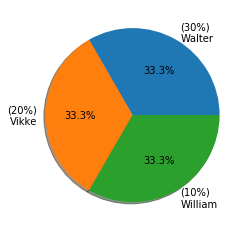

In [87]:
def pieChart():
    procent = {}
    for prog in studentProgress:
        t = int(math.ceil(studentProgress[prog] / 10.0)) * 10
        procent[t] = procent.get(t, 0) + 1
    sizes = []
    labels = []
    for t in procent:
        sizes.append((procent[t] / len(studentProgress)) * 100)
        label = []
        for prog in studentProgress:
            if t == int(math.ceil(studentProgress[prog] / 10.0)) * 10:
                label.append(prog)
        labels.append('({}%)\n'.format(t) + ',\n'.join(label))


    # Plot
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
pieChart()

{'Tredje semester': 1, 'Anden semester': 2, 'Første semester': 1}
{'Python': 2, 'Anden semester': 1, 'Første semester': 1}


<BarContainer object of 3 artists>

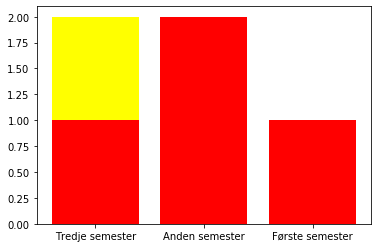

In [88]:
maleCourses = {}
femaleCourses = {}
for student in students:
    for course in students[student].getCourses():
        if(students[student].gender == 'Male'):
            maleCourses[course.name] = maleCourses.get(course.name, 0) + 1
        else:
            femaleCourses[course.name] = femaleCourses.get(course.name, 0) + 1
print(maleCourses)
print(femaleCourses)
y_bar = maleCourses.keys()
x_bar1 = maleCourses.values()
x_bar2 = femaleCourses.values()

plt.bar(y_bar, x_bar1 if len(x_bar1) > len(x_bar2) else x_bar2, align='center', color='yellow')
plt.bar(y_bar, x_bar2 if len(x_bar2) < len(x_bar2) else x_bar1, align='center', color='red')